In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, normalize

from sklearn.cluster import KMeans 

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score



In [2]:
dataset = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Week9\\SupermarketPurchase.csv")
dataset.head()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


In [3]:
dataset.columns

Index(['Cust_id', 'AVG_Actual_price_12', 'Purchase_Value', 'No_of_Items',
       'Total_Discount', 'MONTH_SINCE_LAST_TRANSACTION'],
      dtype='object')

In [4]:
dataset = dataset.rename(columns = {'Cust_id':'cust_id','AVG_Actual_price_12':'avg_actual_price',
                                    'Purchase_Value':'purchase_value','No_of_Items':'no_items',
                                    'Total_Discount':'total_discount','MONTH_SINCE_LAST_TRANSACTION':'months'
                                   
                                   } 
                        
                        )

In [5]:
dataset.columns

Index(['cust_id', 'avg_actual_price', 'purchase_value', 'no_items',
       'total_discount', 'months'],
      dtype='object')

In [6]:
dataset.isnull().sum()

cust_id             0
avg_actual_price    0
purchase_value      0
no_items            0
total_discount      0
months              0
dtype: int64

In [7]:
dataset.describe()

,cust_id,avg_actual_price,purchase_value,no_items,total_discount,months
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,501.414530,2642.877917,19820.633305,10.720798,20806.339088,5.029915
std,295.756706,1879.138285,34639.752609,20.038311,58427.798572,3.562840
min,1.000000,22.500000,45.000000,1.000000,-3962.480000,1.000000
25%,245.750000,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,486.500000,2100.000000,8660.000000,4.000000,2599.250000,4.000000
75%,763.750000,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,1006.000000,10000.000000,302721.740000,172.000000,734349.820000,12.000000


In [8]:
dataset["cust_id"] = str(dataset["cust_id"])

In [9]:
dataset.describe()

,avg_actual_price,purchase_value,no_items,total_discount,months
count,702.000000,702.000000,702.000000,702.000000,702.000000
mean,2642.877917,19820.633305,10.720798,20806.339088,5.029915
std,1879.138285,34639.752609,20.038311,58427.798572,3.562840
min,22.500000,45.000000,1.000000,-3962.480000,1.000000
25%,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,2100.000000,8660.000000,4.000000,2599.250000,4.000000
75%,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,10000.000000,302721.740000,172.000000,734349.820000,12.000000


In [12]:
dataset["cust_id"].dtypes

dtype('O')

In [14]:
dataset.shape

(702, 6)

In [25]:
dataset = dataset.drop("cust_id",axis = 1)

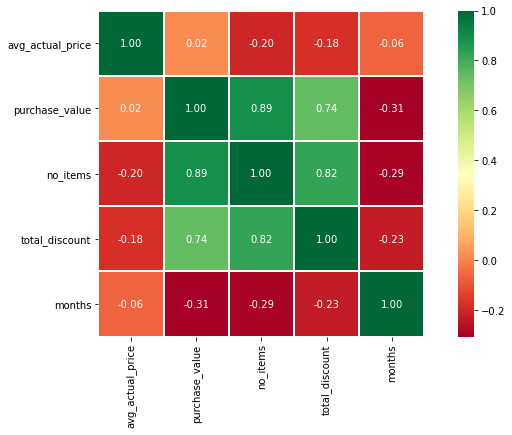

In [26]:
f, ax = plt.subplots(figsize=(12,6))

sns.heatmap(dataset.corr(),square=True, cmap="RdYlGn",linewidth=1,annot=True,fmt='.2f')

In [27]:
dataset.dtypes

avg_actual_price    float64
purchase_value      float64
no_items              int64
total_discount      float64
months                int64
dtype: object

In [30]:
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(dataset.iloc[:,:])


normalized_df = normalize(scaled_df)

normalized_df = pd.DataFrame(normalized_df)


In [31]:
#PCA

#Only 3 of them are well correlated,thus n=3
pca = PCA(n_components = 3)

X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1','P2','P3']

X_principal.head()



,P1,P2,P3
0,-0.647738,0.123130,0.147053
1,0.474868,0.157772,-0.139255
2,0.061573,-0.282731,-0.058516
3,0.674888,-0.309109,0.138001
4,-0.240698,0.051002,-0.147757


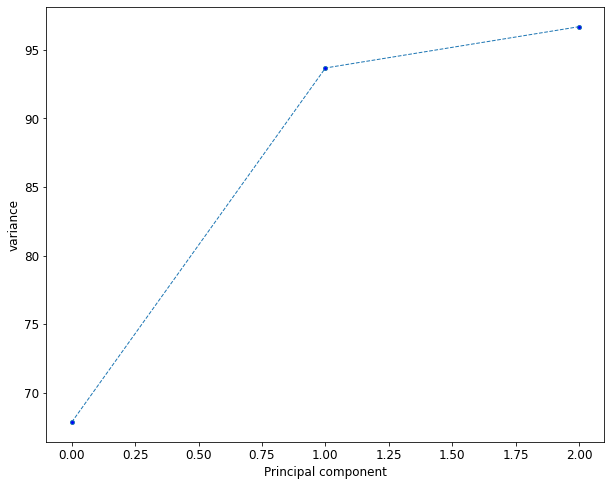

In [32]:
plt.figure(figsize=[10,8])
plt.rcParams['font.size'] = 12

pca.explained_variance_ratio_
variance_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)


plt.plot(variance_sum, linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=4)
plt.xlabel('Principal component')
plt.ylabel('variance')

X = X_principal

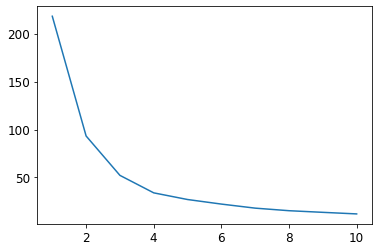

In [33]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= None)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)

In [36]:
#According to Elbow method,4 clusters should  be used
kmeans = KMeans( n_clusters = 4, init = 'k-means++')
kmeans.fit(X)
print(kmeans.cluster_centers_)

clusters = kmeans.fit_predict(X)
dataset['label']=clusters

[[ 0.00253867 -0.17275457 -0.09045056]
 [ 0.49678973  0.59932831 -0.01337319]
 [-0.46408462  0.03637568  0.02556515]
 [ 0.59206599 -0.21244337  0.05692799]]


In [37]:
dataset.head()

,avg_actual_price,purchase_value,no_items,total_discount,months,label
0,300.000000,1200.00,4,0.00,11,3
1,2563.282500,41012.52,16,78737.48,2,1
2,3510.000000,7020.00,2,780.00,4,0
3,4530.000000,13590.00,3,1510.00,1,1
4,2428.076923,33455.00,15,17445.00,6,3


In [41]:
dataset["label"].unique()

array([3, 1, 0, 2])

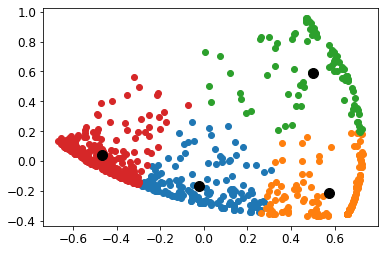

In [42]:
plt.scatter(X_principal['P1'][dataset.label == 0 ], X_principal['P2'][dataset.label == 0 ])
plt.scatter(X_principal['P1'][dataset.label == 1 ], X_principal['P2'][dataset.label == 1 ]) 
plt.scatter(X_principal['P1'][dataset.label == 2 ], X_principal['P2'][dataset.label == 2 ]) 
plt.scatter(X_principal['P1'][dataset.label == 3 ], X_principal['P2'][dataset.label == 3 ]) 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,color = "k")
plt.show()

#I guess it's quite babat clustering